In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

Mounted at /content/drive


In [ ]:
data = pd.read_csv("./data_train.csv")

In [ ]:
print(data.shape)
data.isnull().sum()

(320, 10)


Unnamed: 0           0
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
if 'Unnamed: 0' in list(data.keys()):
    data.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,109,331,116,5,5.0,5.0,9.38,1,0.93
1,346,316,98,1,1.5,2.0,7.43,0,0.49
2,99,332,119,4,5.0,4.5,9.24,1,0.90
3,210,301,104,3,3.5,4.0,8.12,1,0.68
4,242,317,103,2,2.5,2.0,8.15,0,0.65


In [ ]:
median = data['Chance of Admit '].median()
print(median)
mean = data['Chance of Admit '].mean()
print(mean)

0.72
0.7170625


In [ ]:
data['Label'] = np.where(data['Chance of Admit '] > median, 1, 0)

In [ ]:
data['Label']

0      1
1      0
2      1
3      0
4      0
      ..
315    1
316    0
317    0
318    0
319    0
Name: Label, Length: 320, dtype: int64

In [ ]:
print(data.head(10))
print(data.columns)

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0         109        331          116                  5  5.0   5.0  9.38   
1         346        316           98                  1  1.5   2.0  7.43   
2          99        332          119                  4  5.0   4.5  9.24   
3         210        301          104                  3  3.5   4.0  8.12   
4         242        317          103                  2  2.5   2.0  8.15   
5         393        326          112                  4  4.0   3.5  9.12   
6         209        305          106                  2  3.0   3.0  8.16   
7         187        317          107                  3  3.5   3.0  8.68   
8         279        308          103                  2  3.0   3.5  8.49   
9          52        312          100                  2  1.5   3.5  7.90   

   Research  Chance of Admit   Label  
0         1              0.93      1  
1         0              0.49      0  
2         1              0.90      

In [ ]:
def accuracy(model,X,y):
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    predictions = model.predict(X)
    for i in range(len(y)):
        pred = predictions[i]
        act = y[i]
        if pred == 1 and act == 1:
            TP += 1
        elif pred == 0 and act == 1:
            FN += 1
        elif pred == 1 and act == 0:
            FP += 1
        else:
            TN += 1

    return (TP + TN)/(TP + TN + FP + FN)

The obove code is a function that returns the accuracy of the SVM model

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
#part b)
lin_kern = svm.SVC(kernel = 'linear')
rbf_kern = svm.SVC(kernel = 'rbf')
poly_kern = svm.SVC(kernel = 'poly',degree = 3)

models = {'linear':lin_kern,'rbf':rbf_kern,'poly':poly_kern}
label_combinations = [['CGPA','SOP'],['CGPA','GRE Score'],['SOP','LOR '],['LOR ','GRE Score']]

split = int(data.shape[0] / 5)

data_train = data.iloc[0:split].reset_index().drop('index',axis=1)
data_valid = data.drop(data.index[0:split]).reset_index().drop('index',axis=1)

X_train = data_train.drop('Label', axis=1)
Y_train = data_train['Label']

X_valid = data_valid.drop('Label', axis=1)
Y_valid = data_valid['Label']

The above code initializes the 3 different kernels for the models and splits the data with an 80-20 split into training and validating data respectively.

Model: linear
	labels: ['CGPA', 'SOP']
	f) Accuracy 0.82421875
	d) Number of Support Vectors: 28
	d) Support Vectors:
 [[8.12 3.5 ]
 [8.49 3.  ]
 [8.62 2.5 ]
 [8.45 3.  ]
 [8.   4.  ]
 [8.28 3.5 ]
 [8.53 3.5 ]
 [8.45 3.5 ]
 [8.5  4.  ]
 [8.84 3.  ]
 [9.   2.5 ]
 [8.64 5.  ]
 [8.76 3.5 ]
 [9.22 3.5 ]
 [9.12 4.  ]
 [8.68 3.5 ]
 [8.87 3.5 ]
 [8.54 2.5 ]
 [8.67 3.5 ]
 [8.88 4.  ]
 [9.06 4.5 ]
 [8.17 3.  ]
 [8.76 3.  ]
 [8.12 3.  ]
 [8.56 3.5 ]
 [8.75 4.  ]
 [9.1  3.5 ]
 [8.78 4.  ]] 

	labels: ['CGPA', 'GRE Score']
	f) Accuracy 0.8359375
	d) Number of Support Vectors: 27
	d) Support Vectors:
 [[  8.15 317.  ]
 [  8.62 320.  ]
 [  8.   319.  ]
 [  8.56 329.  ]
 [  8.28 317.  ]
 [  8.53 312.  ]
 [  8.45 312.  ]
 [  8.5  315.  ]
 [  8.84 327.  ]
 [  8.43 313.  ]
 [  9.   316.  ]
 [  8.76 324.  ]
 [  9.22 318.  ]
 [  8.68 317.  ]
 [  9.02 314.  ]
 [  8.87 324.  ]
 [  8.54 317.  ]
 [  8.67 325.  ]
 [  8.88 323.  ]
 [  9.08 324.  ]
 [  8.17 314.  ]
 [  8.76 325.  ]
 [  8.12 311.  ]
 [  9.08 324.

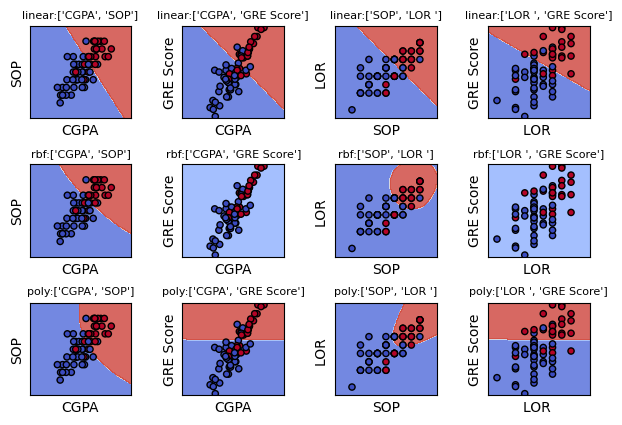

In [43]:

fig, sub = plt.subplots(3, 4)
plt.subplots_adjust(wspace=.5, hspace=.5,left = 0.125, right = 1)
i = 0
sub = sub.flatten()
accuracys = []
for model_type in models:
    print('Model:',model_type)
    model = models[model_type]
    for label_set in label_combinations:
        set_train = X_train[label_set]
        set_valid = X_valid[label_set]
        model.fit(set_train,Y_train)

        #part f)
        acc = accuracy(model,set_valid,Y_valid)

        print('\tlabels:',label_set)


        print('\tf) Accuracy',acc)
        #part d)
        print('\td) Number of Support Vectors:',len(model.support_vectors_))
        print('\td) Support Vectors:\n',model.support_vectors_,'\n')
        accuracys += [acc]
        preds = model.predict(set_valid)

        disp = DecisionBoundaryDisplay.from_estimator(
            model,
            set_valid,
            response_method="predict",
            cmap=plt.cm.coolwarm,
            alpha=0.8,
            ax=sub[i],
            xlabel=label_set[0],
            ylabel=label_set[1],
        )

        sub[i].scatter(X_train[label_set[0]],X_train[label_set[1]], c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
        sub[i].set_xticks(())
        sub[i].set_yticks(())
        sub[i].set_title(f"{model_type}:{label_set}",fontsize = 8)
        i += 1
print(accuracys)

f) Based on the graphs above the best models seem to be linear with CGPA and sop, linear with CGPA and GRE, Linear with LOR and GRE, poly with CGOA and SOP, and poly with CGPA and GRE and upon looking at the accuracies for each model they all perform in the 80% accuracy range.

Based on the accuracy scores the best model seems to be the Poly model trained on SOP and CGPA

In [ ]:
final_model = svm.SVC(kernel = 'poly',degree = 3)
final_model.fit(X_train[['CGPA','SOP']],Y_train)
test_data = pd.read_csv("./data_test.csv")
preds = final_model.predict(test_data[['CGPA','SOP']])
preds_file = open("./preds.csv","w+")
preds_file.write("preds\n")
for i in range(len(preds)):
    preds_file.write(f"{preds[i]}\n")

[0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1
 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1
 0 0 0 0 0 1]


The code above trains the model that did best during the validation stage and then predicts the labels for the test data and writes it to a CSV